In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")

df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#graph for catagorical data

<AxesSubplot:xlabel='Survived', ylabel='count'>

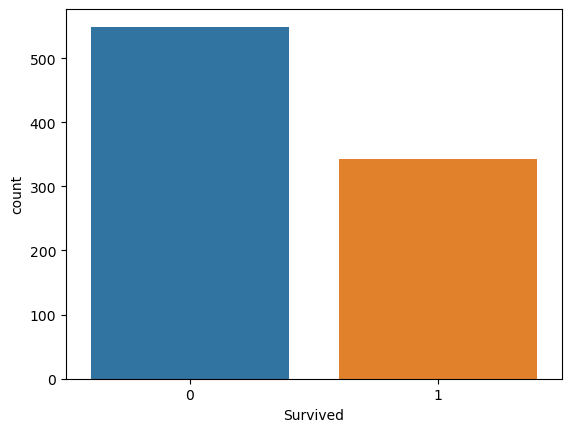

In [5]:
import seaborn as sns

sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

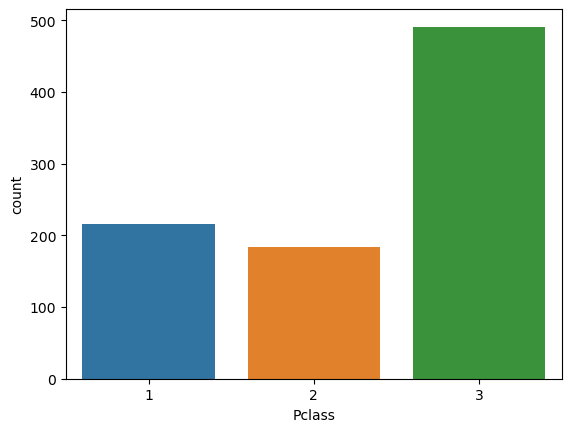

In [6]:
sns.countplot(x='Pclass',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

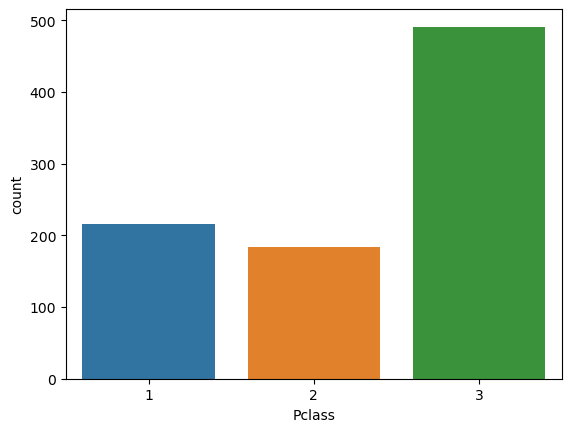

In [7]:
sns.countplot(x='Pclass',data=df_train)

<AxesSubplot:xlabel='Age', ylabel='count'>

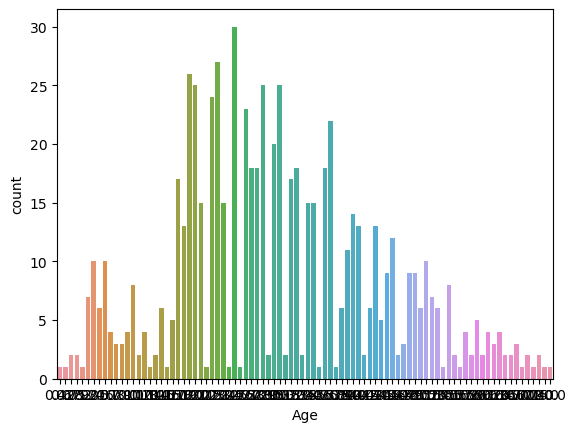

In [8]:
sns.countplot(x='Age',data=df_train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

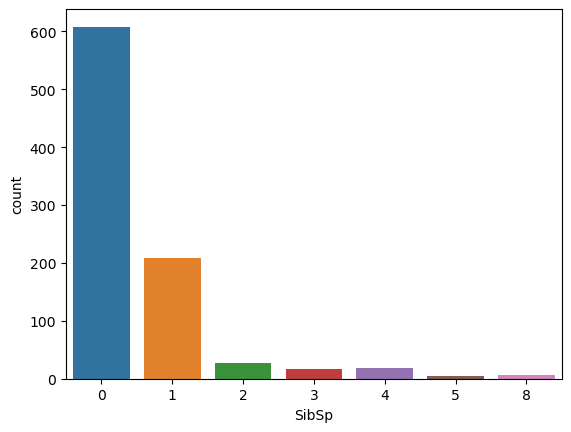

In [9]:
sns.countplot(x='SibSp',data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

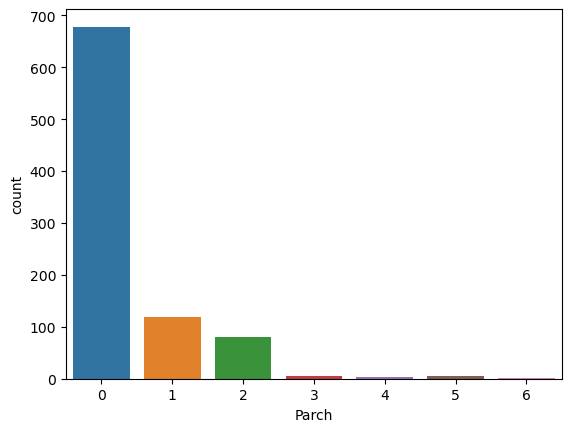

In [10]:
sns.countplot(x='Parch',data=df_train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

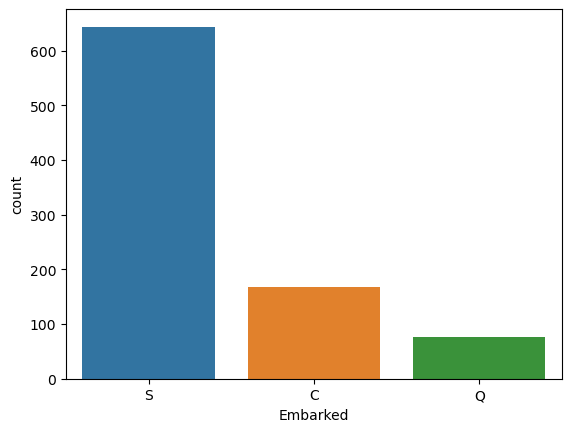

In [11]:
sns.countplot(x='Embarked',data=df_train)

In [12]:
# graphs for numerical attributes

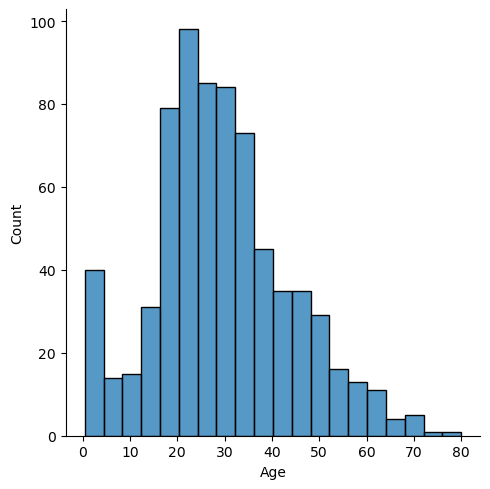

In [13]:
sns.displot(df_train['Age'])

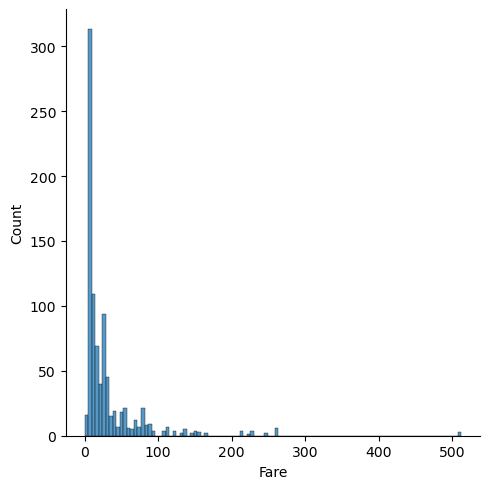

In [14]:
sns.displot(df_train['Fare'])

**data preprocessing**

In [15]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [16]:
df_train['Sex']=df_train['Sex'].replace('male',0)

df_train['Sex']=df_train['Sex'].replace('female',1)

In [17]:
df_train['Embarked']=df_train['Embarked'].replace('S',0)

df_train['Embarked']=df_train['Embarked'].replace('C',1)

df_train['Embarked']=df_train['Embarked'].replace('Q',2)

In [18]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mode()[0])

In [20]:
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [21]:
df_train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0

In [22]:
x1 = df_train.drop(['Survived'],axis=1)

In [23]:
y1 = df_train['Survived']

In [24]:
#test data

df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [25]:
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [26]:
df_test['Sex']=df_test['Sex'].replace('male',0)

df_test['Sex']=df_test['Sex'].replace('female',1)

In [27]:
df_test['Embarked']=df_test['Embarked'].replace('S',0)

df_test['Embarked']=df_test['Embarked'].replace('C',1)

df_test['Embarked']=df_test['Embarked'].replace('Q',2)

In [28]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mode()[0])

In [29]:
df_test['Embarked']=df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

In [30]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

<AxesSubplot:>

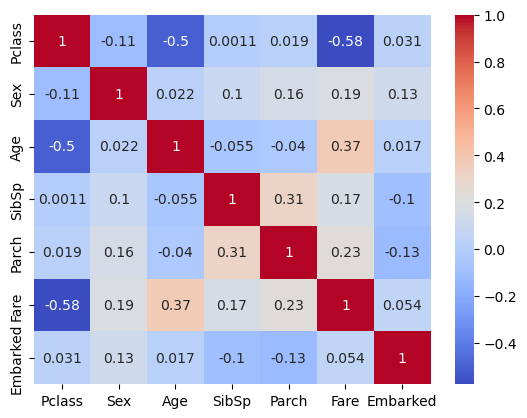

In [31]:
sns.heatmap(df_test.corr(),annot = True, cmap = 'coolwarm')

In [32]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
#training and testing

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

In [35]:
model1 = LogisticRegression(max_iter=110)

model2 = DecisionTreeClassifier()

model3 = SVC()

model4 = RandomForestClassifier()

model5 = ExtraTreesClassifier()

model6 = XGBClassifier()

model7 = LGBMClassifier()

In [36]:
#model training and testing
model1.fit(x1,y1)
predict10 = model1.predict(df_test)

model2.fit(x1,y1)
predict20 = model2.predict(df_test)

model3.fit(x1,y1)
predict30 = model3.predict(df_test)

model4.fit(x1,y1)
predict40 = model4.predict(df_test)

model5.fit(x1,y1)
predict50 = model5.predict(df_test)

model6.fit(x1,y1)
predict60 = model6.predict(df_test)

model7.fit(x1,y1)
predict70 = model7.predict(df_test)

In [37]:
z=gender_submission['Survived']

In [38]:
#score checking
print("model1 score:" ,accuracy_score(predict10,z))

print("model2 score:" ,accuracy_score(predict20,z))

print("model3 score:" ,accuracy_score(predict30,z))

print("model4 score:" ,accuracy_score(predict40,z))

print("model5 score:" ,accuracy_score(predict50,z))

print("model6 score:" ,accuracy_score(predict60,z))

print("model7 score:" ,accuracy_score(predict70,z))

model1 score: 0.930622009569378
model2 score: 0.7177033492822966
model3 score: 0.65311004784689
model4 score: 0.7918660287081339
model5 score: 0.7751196172248804
model6 score: 0.8157894736842105
model7 score: 0.8492822966507177


In [39]:
gender_submission['LR_pred']=predict10

gender_submission['DecisionTree_pred']=predict20

gender_submission['SVM_pred']=predict30

gender_submission['RFC_pred']=predict40

gender_submission['XtraTree_pred']=predict50

gender_submission['XGB_pred']=predict60

gender_submission['LGBM_pred']=predict70

In [40]:
import graphviz as gv
from sklearn import tree

In [41]:
fn = x1.columns

tn=['alive','dead']

In [42]:
tree.export_graphviz(model2,

                     out_file="tree.dot",

                     feature_names = fn, 

                     class_names=tn,

                     filled = True)

In [43]:
!dot -Tpng -Gdpi=600 tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.497918 to fit


In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20), dpi = 600)

tree.plot_tree(model2,

               feature_names = fn, 

               class_names=tn,

               filled = True);

fig.savefig('D:\pythonProject1\plottreefncn.png')

In [45]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [46]:
submission['Survived']=predict10

In [47]:
submission.to_csv("submission.csv",index = False)